In [ ]:
# Start writing code here...
import numpy as np
import scipy.linalg as linalg
from numpy.linalg import norm as norm
import matplotlib.pyplot as plt

### Exercise 4


Collaborated with Varshini

This function generates G

In [ ]:
#Problem 4a:

n = 10

def generate_g(n):
    G = np.zeros ((n,n))
    np.fill_diagonal(G, 1)
    G[: , [-1]] = 1
    G
    for i in range(n):
        G[i, :i] = -1
    return G

generate_g(n)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [-1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [-1., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [-1., -1., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.],
       [-1., -1., -1., -1.,  1.,  0.,  0.,  0.,  0.,  1.],
       [-1., -1., -1., -1., -1.,  1.,  0.,  0.,  0.,  1.],
       [-1., -1., -1., -1., -1., -1.,  1.,  0.,  0.,  1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1.,  0.,  1.],
       [-1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.]])

This finds the run time

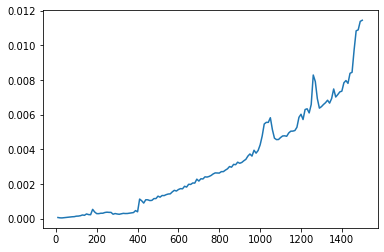

In [ ]:
#Problem 4b:
from time import process_time,time
import numpy as np
import scipy.linalg

def generate_g(n):
    G = np.zeros ((n,n))
    np.fill_diagonal(G, 1)
    G[: , [-1]] = 1
    for i in range(n):
        G[i, :i] = -1
    return G


n_list = list(range(10, 1510, 10))
#for n in n_list:
#    print(generate_g(n))

times_list = []


for n in n_list:
    start_time = process_time()
    generate_g(n)
    end_time = process_time()
    time = end_time-start_time
    times_list.append(time)


plt.plot(n_list, times_list)

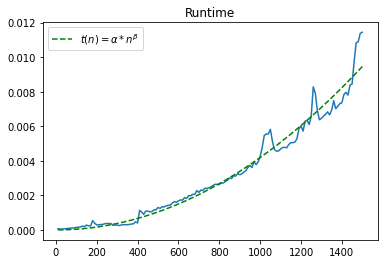

3.959739170518327e-09
2.0081546670375574


In [ ]:
#4c

from scipy.optimize import curve_fit

def relationship(x, a, b):
  #return a*pow(x,b)
  return a*(x**b)

fitting_parameters, covariance = curve_fit(relationship, n_list, times_list)
a, b = fitting_parameters
plt.plot(n_list, times_list)
plt.plot(n_list, relationship(n_list, *fitting_parameters), 'g--', label='$t(n) = \\alpha*n^{\\beta}$')
plt.legend()
plt.title("Runtime")
plt.draw()
plt.savefig("graph_4b.jpeg", dpi=300, bbox_inches='tight')
plt.show()


print(a)
print(b)

In [ ]:
n=4
x = np.ones(n)
print(x.shape)
G_n = generate_g(n)
#G_n.shape
b = G_n@x
b

(4,)


array([ 2.,  1.,  0., -2.])

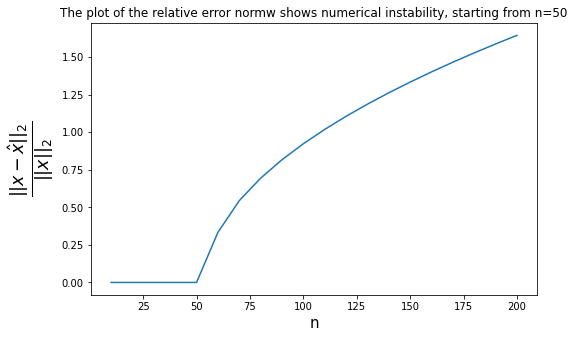

In [ ]:
ns = list(range(10, 210, 10))
# Calculate the ||x-x_hat||_2
relative_errors_2_norm = []
for n in ns:
    x = np.ones(n)
    G_n = generate_g(n)
    b = G_n@x
    x_hat = np.linalg.solve(G_n, b)
    relative_error = (np.linalg.norm(x_hat-x) / np.linalg.norm(x_hat))
    relative_errors_2_norm.append(relative_error)

plt.figure(figsize=(8,5))
plt.plot(ns, relative_errors_2_norm)
plt.xlabel('n', fontsize=15)
plt.ylabel('$\\frac{||x-\hat{x}||_2}{||x||_2}$', fontsize=25)
plt.draw()
plt.title("The plot of the relative error normw shows numerical instability, starting from n=50")
plt.savefig("graph_4c.jpeg", dpi=300, bbox_inches='tight')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=303cded5-97e1-48a5-99d5-f7af244854dc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>